In [1]:
# Python program to demonstrate
# KNN classification algorithm
# on IRIS dataset

from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

iris_dataset=load_iris()
wine_dataset=load_wine()

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(iris_dataset)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', df_iris.shape[1]+1)

print(df_iris.iloc[0:150])



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [2]:
wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
iris_dataset.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<ipython-input-5-4f9de9a113ac>:33: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-5-4f9de9a113ac>:35: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-5-4f9de9a113ac>:37: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


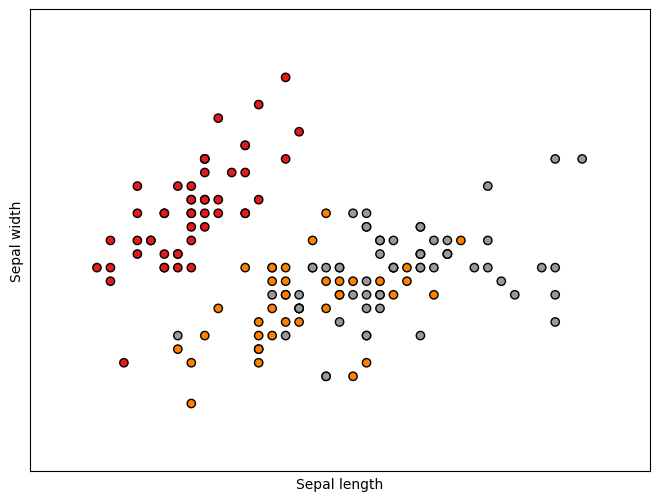

<Figure size 800x600 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

X = iris_dataset.data
y = iris_dataset.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"],
      iris_dataset["target"], train_size=0.6, random_state=49)

X_train.shape

(90, 4)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)

x_new = np.array([[6.2, 3.4, 5.4, 2.3]])
prediction = kn.predict(x_new)

print("Predicted target value: {}\n".format(prediction))
print("Predicted feature name: {}\n".format
    (iris_dataset["target_names"][prediction]))
print("Test score: {:.2f}".format(kn.score(X_test, y_test)))

Predicted target value: [2]

Predicted feature name: ['virginica']

Test score: 0.95


In [8]:
from sklearn.metrics import confusion_matrix

y_pred = kn.predict ( X_test )
confusion_matrix ( y_test , y_pred )



array([[17,  0,  0],
       [ 0, 16,  1],
       [ 0,  2, 24]])

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier (criterion='gini',max_depth =4)
tree_clf.fit(X_train, y_train)

prediction = tree_clf.predict(x_new)
print("Predicted feature name: {}\n".format
    (iris_dataset["target_names"][prediction]))

print("Test score: {:.2f}".format(tree_clf.score(X_test, y_test)))

Predicted feature name: ['virginica']

Test score: 0.90


In [10]:
y_pred = tree_clf.predict ( X_test )
confusion_matrix ( y_test , y_pred )

array([[17,  0,  0],
       [ 0, 16,  1],
       [ 0,  5, 21]])

In [11]:
print(y_test)
print(y_pred)

[1 2 1 2 2 0 2 2 2 2 0 1 0 1 1 2 1 2 2 0 0 1 0 2 0 1 1 1 0 2 0 0 1 0 1 2 0
 2 2 2 0 0 2 1 2 1 2 0 2 2 2 2 1 2 1 0 1 2 2 0]
[1 2 1 2 2 0 2 2 2 2 0 1 0 1 1 1 1 2 2 0 0 1 0 2 0 1 1 2 0 1 0 0 1 0 1 2 0
 2 2 1 0 0 2 1 2 1 2 0 2 2 2 2 1 1 1 0 1 2 1 0]


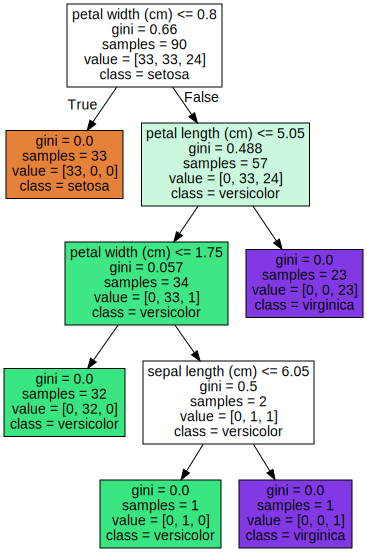

In [12]:
#from sklearn.externals.six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz
#import pydotplus

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
labels = iris_dataset.feature_names

graph = Source(tree.export_graphviz(tree_clf, out_file=None
   , feature_names=labels, class_names=iris_dataset.target_names
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [13]:
#General framework
# import some libraries
# GIVEN: data set D, learning method M
# 1) split data into train and test
# 2) use method M to generate a model (a classifier) Clr: X ---> y
# 3) use test data to evaluate the quality of Clr

from sklearn.datasets import load_iris

iris_dataset=load_iris()
print(iris_dataset.DESCR)
print(iris_dataset.target_names)
print(iris_dataset.feature_names)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
print(iris_dataset["target"].T)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
# split data into train and test
from sklearn.model_selection import train_test_split
X = iris_dataset["data"]
y = iris_dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=49)

# X_train, X_test, y_train, y_test are arrays in NumPy

X_train.shape

(105, 4)

In [16]:
# Using kNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# Using Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier (criterion='gini',max_depth =4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [26]:
# Using SVM?
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=0.025)
svm_clf.fit(X_train, y_train)

SVC(C=0.025, kernel='linear')

In [27]:
# using and evaluation of the model
import numpy as np

x_new = np.array([[6.2, 3.4, 5.2, 2.3]])
prediction = knn.predict(x_new)
pred2 = tree_clf.predict(x_new)
pred3 = svm_clf.predict(x_new)

print("Predicted target value: {}\n".format(prediction))
print("Predicted feature name: {}\n".format
    (iris_dataset["target_names"][prediction]))
print("Prediction of decision tree: {}\n".format
    (iris_dataset["target_names"][pred2]))

print("Prediction of SVM: {}\n".format
    (iris_dataset["target_names"][pred3]))

Predicted target value: [2]

Predicted feature name: ['virginica']

Prediction of decision tree: ['virginica']

Prediction of SVM: ['virginica']



In [20]:
knn.predict(X_test)

array([1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1,
       2])

In [21]:
y_test

array([1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1,
       0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1,
       2])

In [22]:
# accuracy of a classifier
knn.score(X_test,y_test)

0.9555555555555556

In [23]:
tree_clf.score(X_test,y_test)

0.9333333333333333

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict ( X_test )
confusion_matrix ( y_test , y_pred )

array([[14,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 17]])

In [25]:
from sklearn.metrics import confusion_matrix

y_pred = tree_clf.predict ( X_test )
confusion_matrix ( y_test , y_pred )

array([[14,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 16]])